## Analysis of transects
First we are going to analyse transects from the individuals logs whihc are generated at the end of each batch run, so technocally for each environment we only have 30 individual logs and they all refer to a point in time in the iteration which correspond to iteration =  50000


### Housekeeping and importing folders

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
import seaborn as sns
import os
import re
import imageio

In [93]:
# These folders contain simulations run with a toriodal environent and dispersion parameter of 15. 
# The environment is sin function on blue, and 0 on both red and green.
# Basically I re-run these because I realised my environments were wrong and not perfectly toriodal and also I preferred to have 0 on red and green, while before my environments were 0 on red and 127 on green 

# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w5',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w10',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w25',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w50',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w100',]
# Define folder labels
folder_labels = [5, 10, 25, 50, 100]

In [67]:

# These folders contain simulations run with a toriodal environent and dispersion parameter of 15. 
# The environment is sin function on blue, and 0 on both red and green.
# Basically I re-run these because I realised my environments were wrong and not perfectly toriodal and also I preferred to have 0 on red and green, while before my environments were 0 on red and 127 on green 

# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/w50',]
# Define folder labels
folder_labels = [50]

In [33]:
#freq that are on blue as sin, red as 0 and green on 127, 32 BITS GENOMEs
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over50/mh',]
# Define folder labels
folder_labels = [50]

In [88]:
#Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over100/mh',]
# Define folder labels
folder_labels = [5, 10, 25, 50, 100]


In [7]:
#freq that to check the impact of individual colour frequency, in these the environment in 0 on Red and Green and Sin on Blue, turned out, these were not perfectly toroidal
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/50w_0RG',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/50w_RGB',]
# Define folder labels
folder_labels = [50, 50]

In [31]:
# These are the first simulations I run, that I run with the wrong environment with a palette that was from matplot lib rather than being me controlling directly the values of the RGB channels
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over200/mh',]

folder_labels = [5, 10, 25, 50, 100, 200]


### Transect in middle of picture
Creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture

In [94]:
all_stats = []

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Batch Num'] = f'sim {match.group(1)}'
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
    
    # Calculate some stats that will be plotting 
    stats = transects.groupby('X coord')['Species Richness'].agg(['mean', 'median', 'var', 'max', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)]).reset_index()
    stats.columns = ['X coord', 'Average', 'Median', 'Variance', 'max', 'min', '2nd Quantile', '3rd Quantile']
    stats['Environment'] = folder_labels[i]
    
    # Append the stats dataframe to the list
    all_stats.append(stats)
    
# Concatenate all the stats dataframes into a single dataframe
stats_combined = pd.concat(all_stats, ignore_index=True)



In [95]:
# importing all data from all file so I have a table that I can access later. 
all_transects = []
all_sin = []

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Simulation'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation'] = filename
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            colour_cell['Environment'] = folder_labels[i]
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            transects['Environment'] = folder_labels[i]
    
    # Append the stats dataframe to the list
    all_transects.append(transects)
    all_sin.append(colour_cell)
# Concatenate all DataFrames from different folders into a single DataFrame
combined_transects = pd.concat(all_transects, ignore_index=True)
combined_colsin = pd.concat(all_sin, ignore_index=True)

    

Text(0.5, 0, 'X Coordinate')

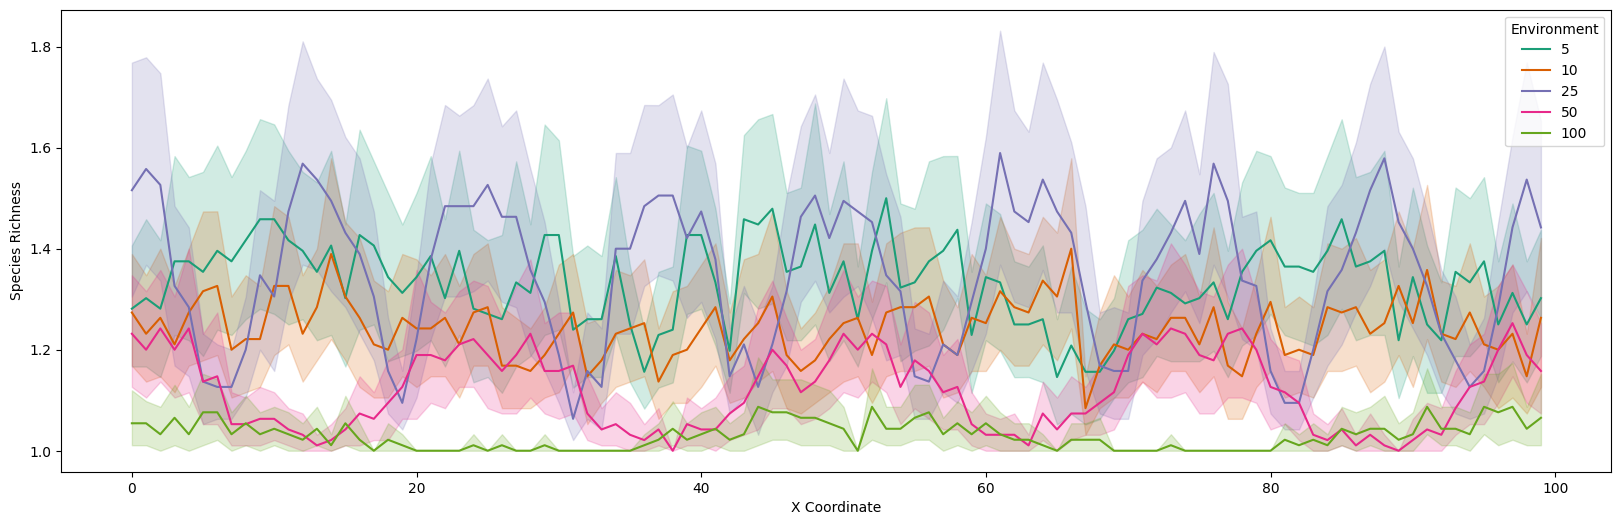

In [99]:
### create a plot of transect with confidence intervall
plt.subplots(figsize=(20, 6))
sns.lineplot( data = combined_transects, x = 'X coord', y = 'Species Richness', hue = 'Environment', palette = 'Dark2')
plt.xlabel('X Coordinate')

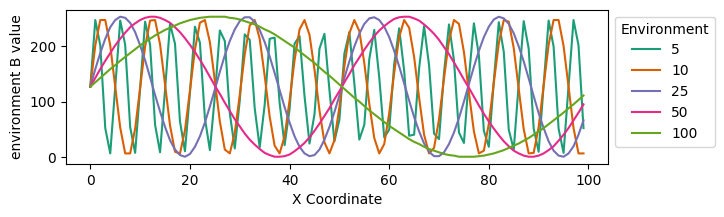

In [92]:
### create a plot of colour with confidence intervall
plt.subplots(figsize = (7, 2))
col = sns.lineplot( data = combined_colsin, x = 'X coord', y = 'environment B value', hue = 'Environment', palette='Dark2', errorbar=None)
plt.xlabel('X Coordinate')
sns.move_legend(col, "upper left", bbox_to_anchor=(1, 1))

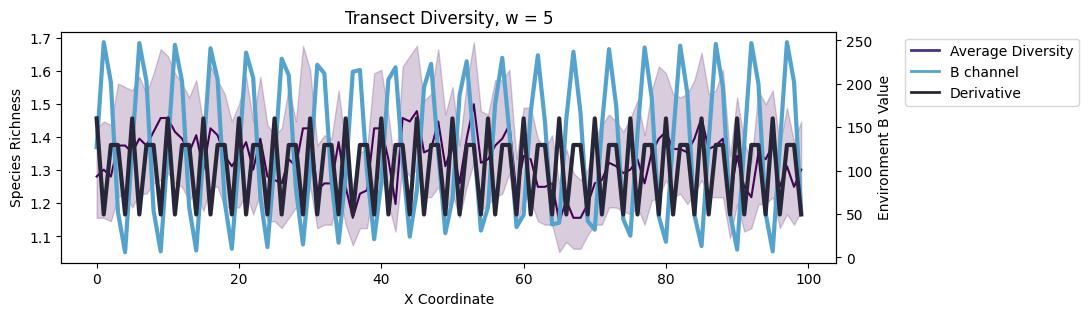

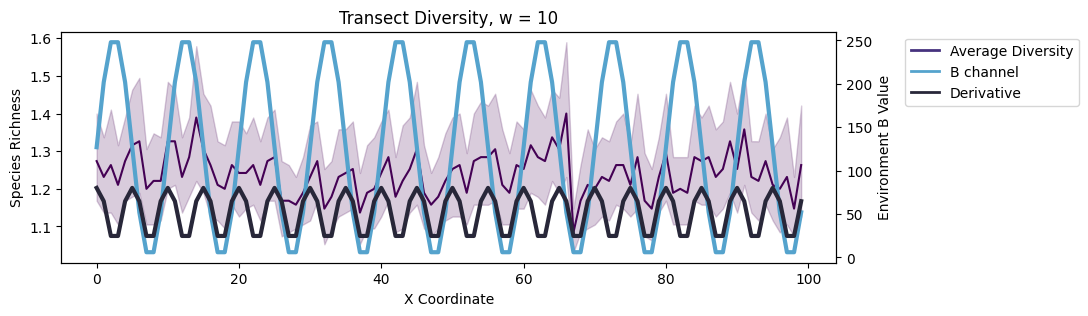

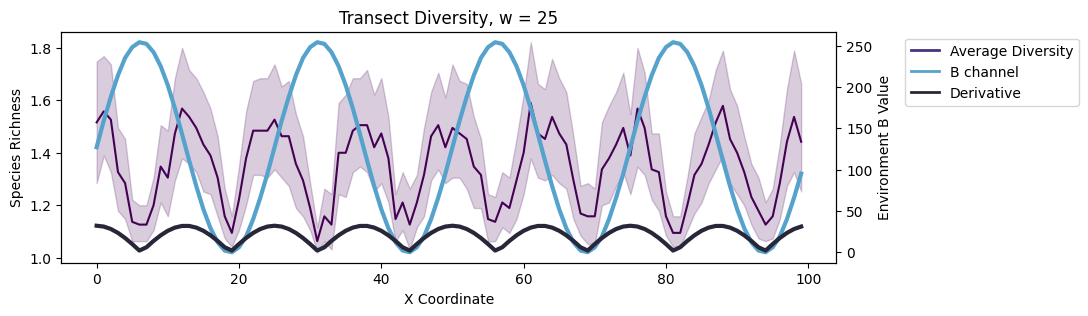

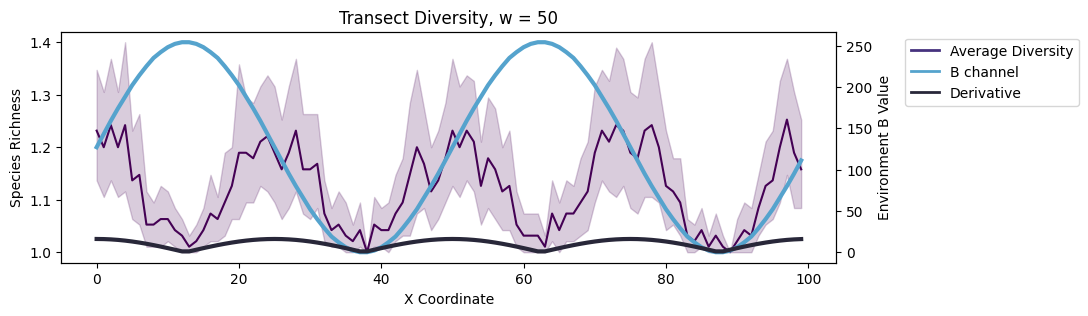

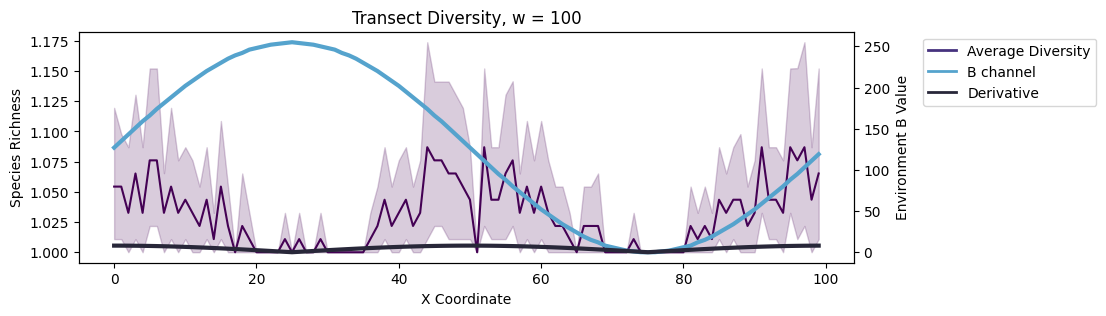

In [108]:
### create a plot of transect with confidence intervall
environments = combined_transects['Environment'].unique()

for env in environments:
    env_data = combined_transects[combined_transects['Environment'] == env]
    col_data = combined_colsin[combined_colsin['Environment'] == env]
    
    # First axis
    fig, ax1 = plt.subplots(figsize=(10, 3))
    sns.lineplot(data=env_data, x='X coord', y='Species Richness', hue='Environment', palette='viridis', ax=ax1)
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Species Richness')
    ax1.set_title(f'Transect Diversity, w = {env}')

    # Second axis 
    ax2 = ax1.twinx()
    sns.lineplot(data=col_data, x='X coord', y='environment B value', ax=ax2, color=sns.color_palette('icefire')[0], linewidth = 3)
    ax2.set_ylabel('Environment B Value')
    #ax2.legend(loc='upper right')
    
    #add derivative of sin env function
    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = env # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (col_data['X coord']) / wavelength))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (col_data['X coord']) / wavelength)))/wavelength # this is the direvative of teh environment function
    # lineplot of derivative
    ax2.plot(col_data['X coord'], devsin, color = sns.color_palette('icefire')[2], linewidth = 3 )
    
    # custom legend
   # Custom legend
    legend_elements = [
        Line2D([0], [0], color=sns.color_palette('viridis')[0], lw=2, label='Average Diversity'),
        Line2D([0], [0], color=sns.color_palette('icefire')[0], lw=2, label='B channel', linewidth = 3),
        Line2D([0], [0], color=sns.color_palette('icefire')[2], lw=2, label='Derivative', linewidth = 3)
    ]
    ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.08, 1))

    
    plt.show()

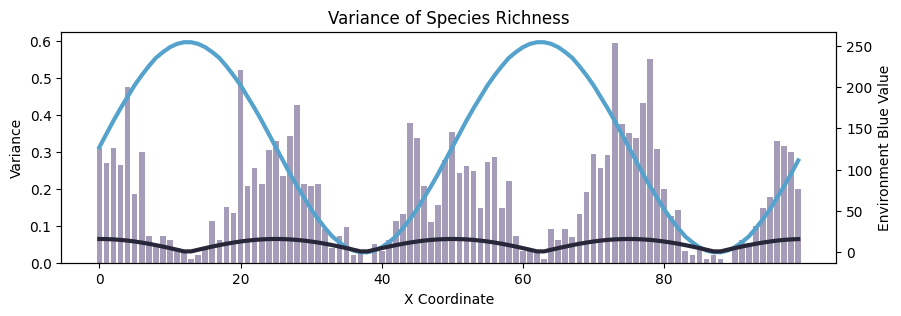

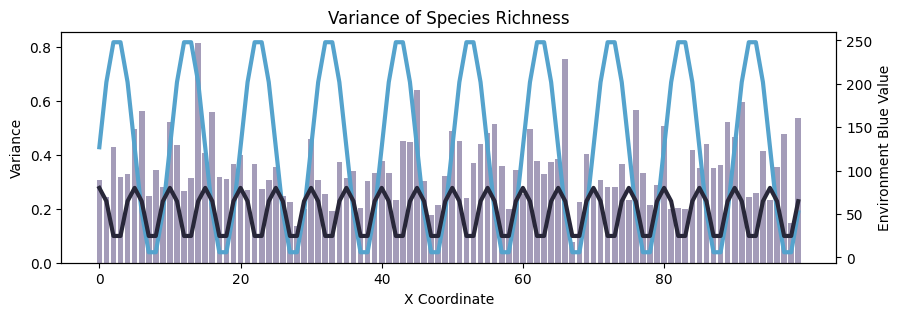

In [57]:
for env in environments:
    env_data = stats_combined[stats_combined['Environment'] == env]
    col_data = combined_colsin[combined_colsin['Environment'] == env]
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 3))

    # Plot the Variance data
    sns.barplot(data=env_data, x='X coord', y='Variance', color=sns.color_palette('viridis')[0], ax=ax1, alpha = 0.5)

    # Set xticks at every 20 units
    ax1.set_xticks(range(0, len(stats['X coord']), 20))
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Variance')
    ax1.set_title('Variance of Species Richness')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=col_data, x='X coord', y='environment B value', ax=ax2, color=sns.color_palette('icefire')[0], linewidth = 3)
    ax2.set_ylabel("Environment Blue Value")


    #add derivative of sin env function
    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = env # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (col_data['X coord']) / wavelength))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (col_data['X coord']) / wavelength)))/wavelength # this is the direvative of teh environment function
    # lineplot of derivative
    ax2.plot(col_data['X coord'], devsin, color = sns.color_palette('icefire')[2], linewidth = 3 )
    
    plt.show()


In [50]:
pal = sns.color_palette(palette='icefire')
pal.as_hex()


['#55a3cd', '#4954b0', '#282739', '#3b2127', '#9c2f45', '#e96f36']

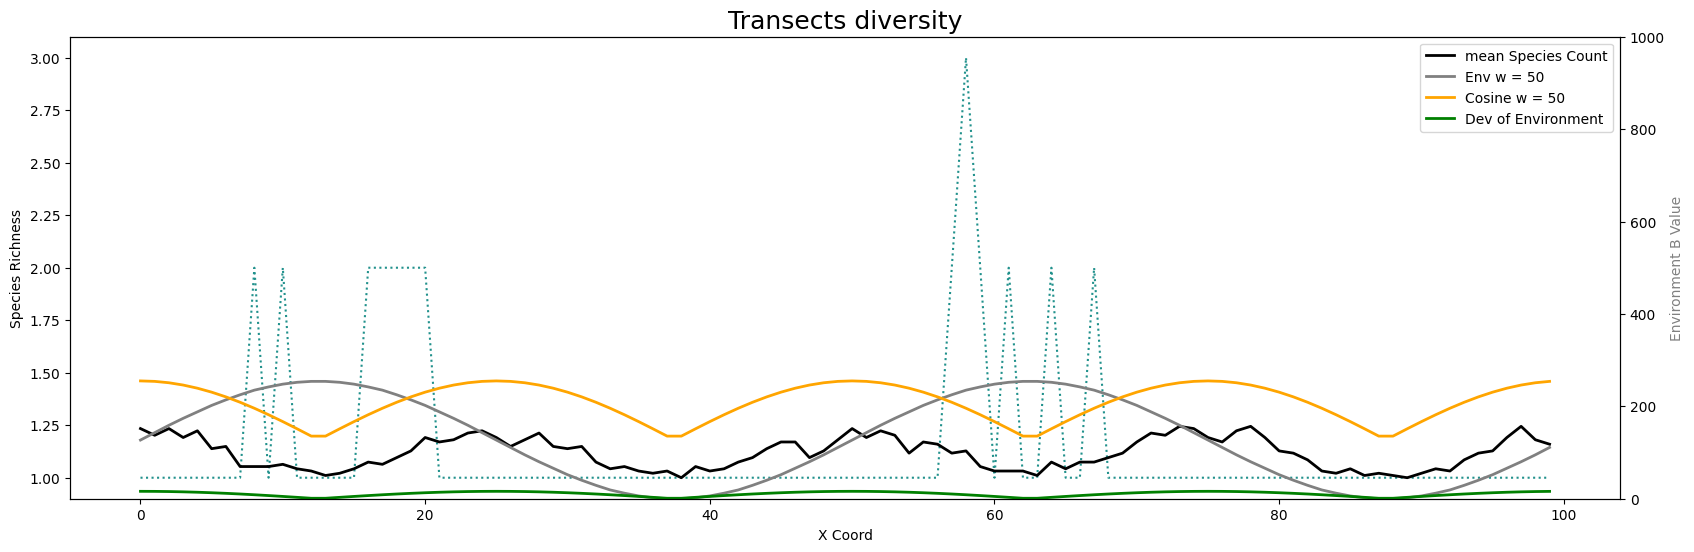

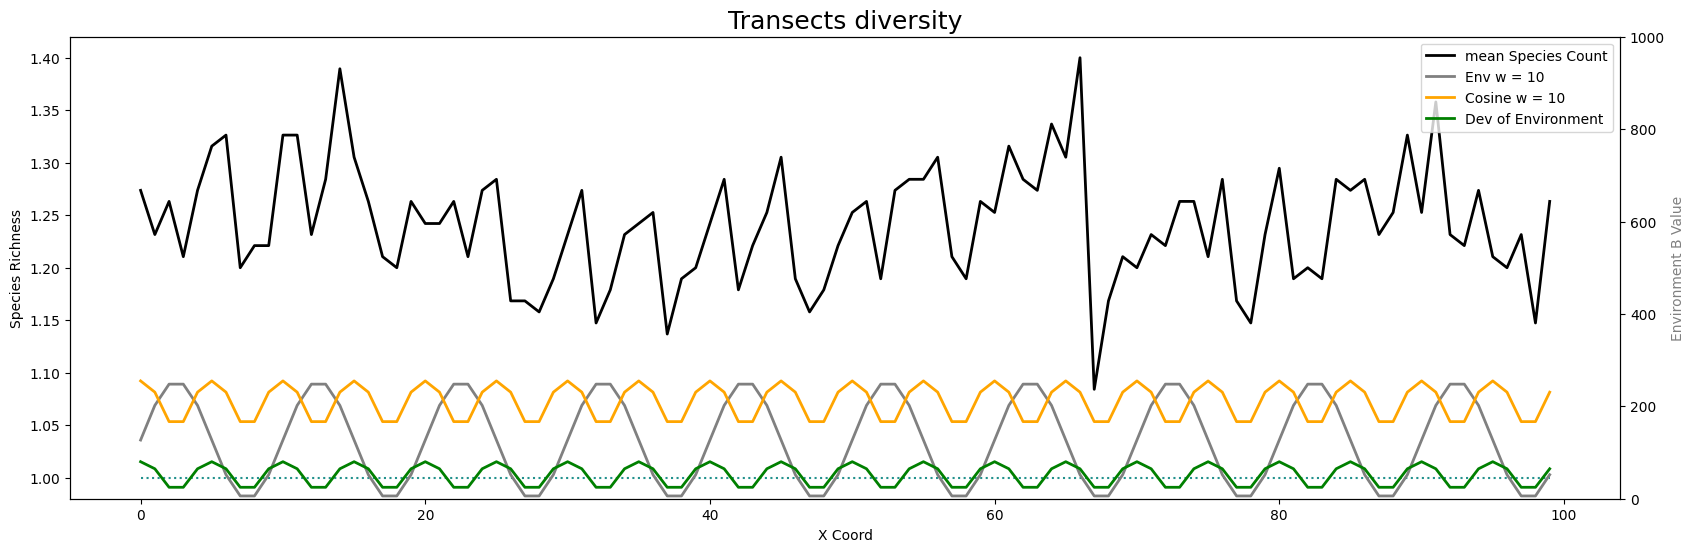

In [39]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Batch Num'] = f'sim {match.group(1)}'
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects= pd.concat([transects, species_count], ignore_index=True)

    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot scatter plot and average line on the primary y-axis (left)
    scatter = sns.lineplot(data=species_count, x='X coord', y='Species Richness', hue='Batch Num', palette='viridis', linestyle='dotted', ax=ax1)
    line1, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)

    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = folder_labels[i] # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength)))/wavelength # this is the direvative of teh environment function


    # Create a secondary y-axis for the environent (right)
    ax2 = ax1.twinx()
    line2, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment', color='gray',  linewidth=2)
    line3, = ax2.plot(colour_cell['X coord'], cosfun, label='Cosine', color='Orange',  linewidth=2)
    line4, = ax2.plot(colour_cell['X coord'], devsin, label='Dev of Env', color='green',  linewidth=2)

    # Set labels and title for the plot
    ax1.set_xlabel('X Coord')
    ax1.set_ylabel('Species Richness')
    ax2.set_ylabel('Environment B Value', color='gray')
    ax2.set_ylim(0, 1000)
    #ax1.set_ylim(0, 3)
    plt.title('Transects diversity', size=18)
    scatter.get_legend().remove()

    # Create my own legend
    handles = [line1, line2, line3, line4,]
    labels = ['mean Species Count', f'Env w = {folder_labels[i]}', f'Cosine w = {folder_labels[i]}', 'Dev of Environment']
    plt.legend(handles=handles, labels=labels, loc='upper right')
    plt.show()





In the following cell I'm trying to see if graphically there is a relationship between the derivative of the sin environmental function and the diversity.

It looks like the diversity might be described by a cosine function where we make absolute the argument of the cos.


Taking a look at the distribution of Diversity when we take a slice of the transect. How many simulations are above the mean? How many are below? what are the outliers? Is this distribution skewed as it was for the total species counts at equilibrium?

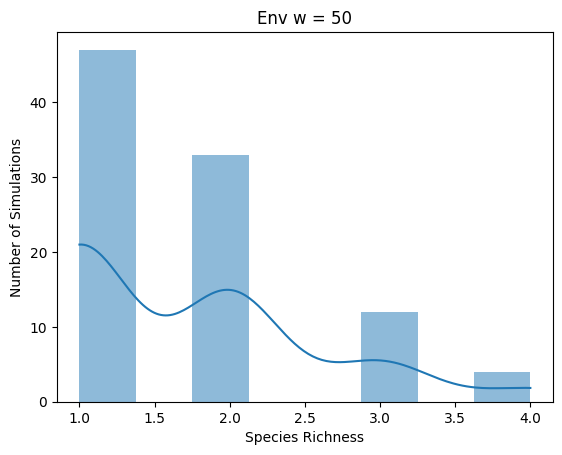

In [20]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation Num'] = match.group(1)
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            
    distribution = transects[transects['X coord'] == 49]  
    plt.figure()  # Create a new figure for each folder    
    sns.histplot(distribution['Species Richness'], kde=True, linewidth = 0)
    plt.xlabel('Species Richness')
    plt.ylabel('Number of Simulations')
    plt.title(f'Env w = {folder_labels[i]}')
    

Checking the environments and what are their values if we take an horizontal transect

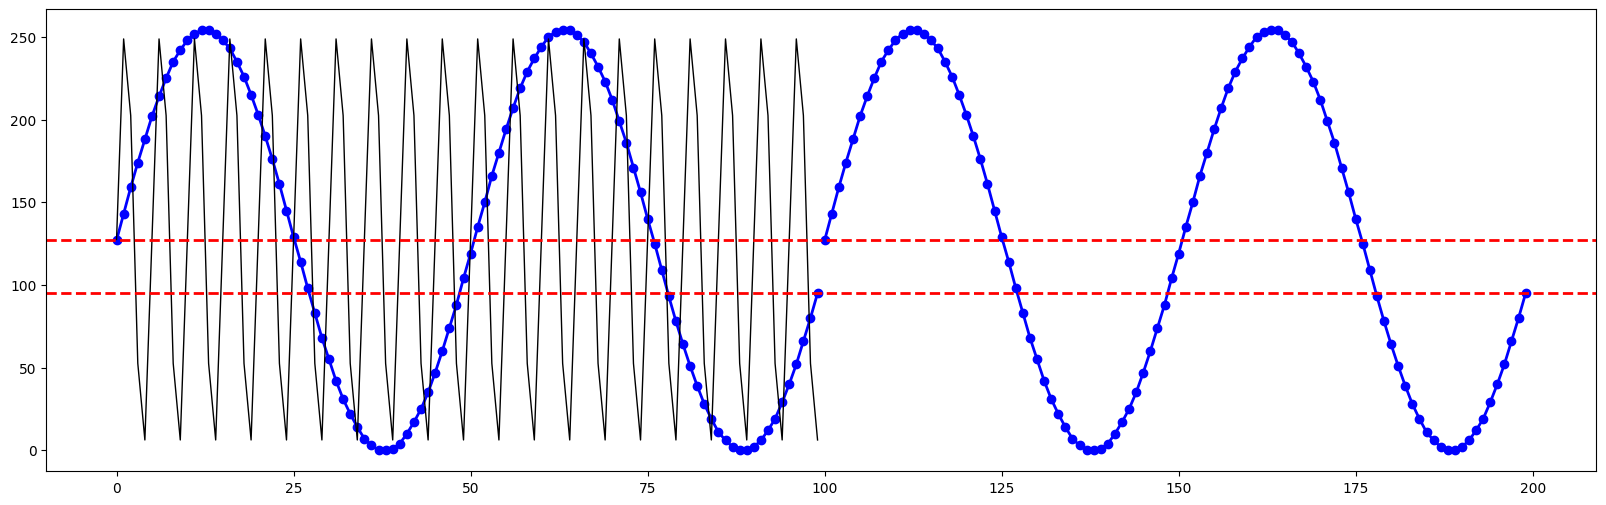

In [16]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 50 (a transect in the middle)
            df = df[df['Y coord'] == 50]
            df = df[['X coord', 'environment G value', 'environment R value', 'environment B value']]
            
            blue = df[['X coord', 'environment B value']]
            blue = blue.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            red = df[['X coord', 'environment R value']]
            red = red.drop_duplicates(subset=['X coord', 'environment R value'], keep='first')
            green = df[['X coord', 'environment G value']]
            green = green.drop_duplicates(subset=['X coord', 'environment G value'], keep='first')

    plt.subplots(figsize=(20, 6))
    plt.plot(blue['X coord'], blue['environment B value'], label='Environment', color='Blue', marker='o',  linewidth=2)
    
    # Recreate the sin function to check:
    wavelength = 5
    sin = (255/2) * (1+ (np.sin(2 * np.pi * (colour_cell['X coord']) / wavelength)))
    
    plt.plot(blue['X coord']+100, blue['environment B value'], label='Environment', color='Blue', marker='o', linewidth=2)
    plt.plot(blue['X coord'], sin, color='black', linewidth = 1)
    plt.axhline(y=95, color='r', linestyle='--', linewidth=2)
    plt.axhline(y=127, color='r', linestyle='--', linewidth=2)
    plt.show()




## Heatmaps of biodiversity

I map the 100x100 px, in each cell I want the number of species counts.

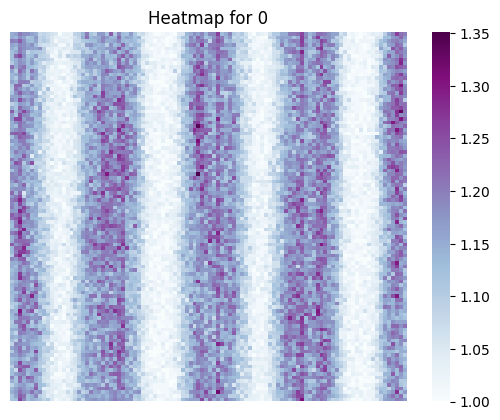

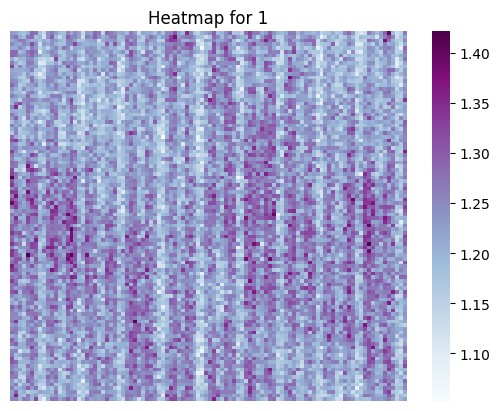

In [74]:
heatmaps = {}  # Dictionary to store heatmaps

for i, folder_path in enumerate(folder_paths):
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'} )
            sc_matrix['Environment'] = folder_labels[i]
            
            # # Create heatmap plot
            # pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
            # sns.heatmap(pivot, cmap='BuPu')
            # plt.axis('off')
            
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)
            # Store the current heatmap in the dictionary
            heatmap_key = match.group(1)
        

    # Store the heatmap data for the current folder in heatmaps dictionary
    heatmap_key = i
    heatmaps[heatmap_key] = heatmap

for key, heatmap in heatmaps.items():
    # Calculate the mean and pivot the data
    pivot_mean = heatmap.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
    # Replace NaN values with 0
    pivot_mean = pivot_mean.fillna(0)
    
    # Create the heatmap plot
    sns.heatmap(pivot_mean, cmap='BuPu')
    plt.axis('off')
    plt.title(f'Heatmap for {key}')  # Add a title to the plot
    plt.show()

In [68]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'} )
            sc_matrix['Environment'] = folder_labels[i]
            
            # the following code is meant to be uncommented if you want an heatmap for each simulation
            #pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
            # sns.heatmap(pivot, cmap='BuPu')
            # plt.axis('off')
            # plt.show()
            
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)

pivot_mean = heatmap.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
# Replace NaN values with 0
pivot_mean = pivot_mean.fillna(0)
sns.heatmap(pivot_mean, cmap='BuPu')
plt.axis('off')
plt.show()

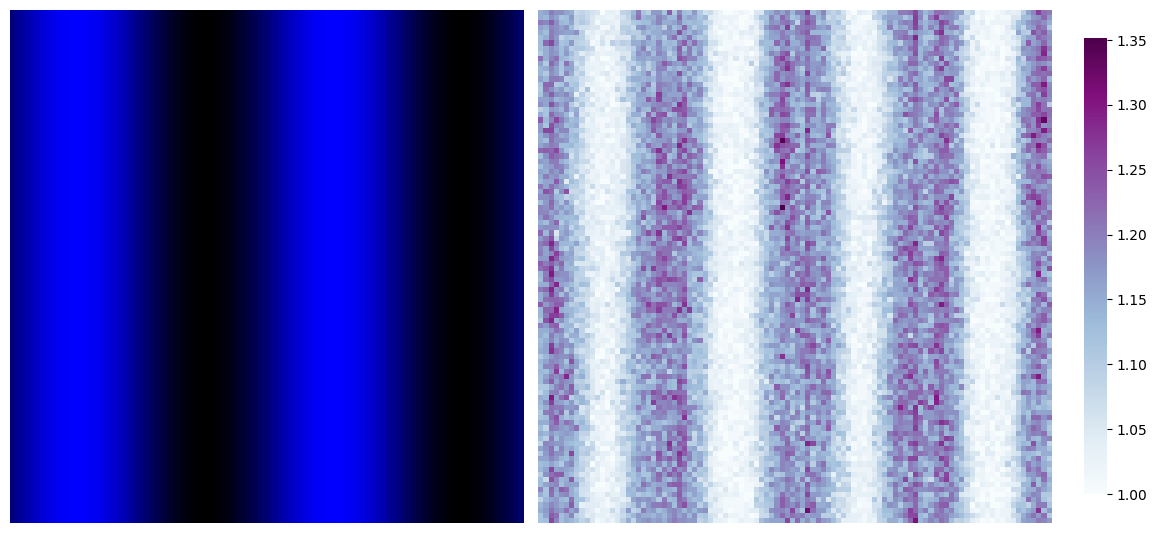

In [70]:
# Load the image to get its dimensions
img = mpimg.imread('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/environments/w50/w50_0RG.png')

# Create a single subplot grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6),gridspec_kw={'width_ratios': [1, 1.25]})  # Set the figure size to match the image

# Plot the heatmap in the first subplot (left side)
sns.heatmap(pivot_mean, cmap='BuPu', ax=axes[1], square=True, cbar_kws={"shrink": 0.8})  # Set square=True for a square aspect ratio

# Load and display the image in the second subplot (right side)
axes[0].imshow(img)
axes[1].axis('off')  # Turn off the axis for the image subplot
axes[0].axis('off')  # Turn off the axis for the image subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
# Create a directory to store the PNG files
if not os.path.exists('heatmap_images'):
    os.makedirs('heatmap_images')

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix = sc_matrix.rename(columns={'species ID': 'Species Richness'})
            
            pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
            sns.heatmap(pivot, cmap='BuPu')
            plt.axis('off')
            
            # Save the figure as a PNG file
            plt.savefig(f'heatmap_images/{filename[:-4]}.png')
            
            plt.close()  # Close the figure to release memory
            
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)

# Create a list of image file paths
image_files = sorted([os.path.join('heatmap_images', f) for f in os.listdir('heatmap_images')])

# Create a list to store images
images = []
for image_file in image_files:
    images.append(imageio.imread(image_file))

# Save the list of images as a GIF
imageio.mimsave('heatmap.gif', images)

# Delete all the PNG files
for file in os.listdir('heatmap_images'):
    file_path = os.path.join('heatmap_images', file)
    os.remove(file_path)

# Delete the directory heatmap_images
os.rmdir('heatmap_images')


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_33566/428584412.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(image_file))


In [ ]:
pal = sns.color_palette(palette='icefire')
pal.as_hex()


['#55a3cd', '#4954b0', '#282739', '#3b2127', '#9c2f45', '#e96f36']